<a href="https://colab.research.google.com/github/Starksood/Experimental_Conundrums/blob/main/CH_7_RNN_for_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recurrent Nuerual Network
Simple Long Term Short Term memory

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
    pass


In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]
table = str.maketrans('', '', string.punctuation)


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-12-13 19:48:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2021-12-13 19:48:11 (125 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("_", " _ ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])        

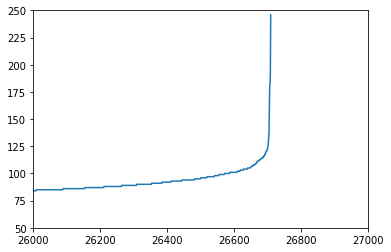

84


In [ ]:
xs = []
ys = []
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
plt.axis([26000, 27000, 50, 250])
plt.show()

print(newys[26000])

In [ ]:
vocab_size = 2000
embedding_dim = 7
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 24000


In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type)


In [ ]:
wc=tokenizer.word_counts
print(wc)

OrderedDict([('former', 96), ('versace', 1), ('store', 39), ('clerk', 8), ('sues', 16), ('secret', 82), ('black', 239), ('code', 18), ('minority', 13), ('shoppers', 3), ('roseanne', 3), ('revival', 10), ('catches', 10), ('thorny', 3), ('political', 77), ('mood', 13), ('better', 106), ('worse', 35), ('mom', 172), ('starting', 41), ('fear', 43), ('sons', 36), ('web', 17), ('series', 55), ('closest', 5), ('thing', 133), ('will', 500), ('grandchild', 2), ('boehner', 26), ('just', 528), ('wants', 125), ('wife', 73), ('listen', 21), ('not', 664), ('come', 93), ('alternative', 11), ('debtreduction', 1), ('ideas', 37), ('j', 42), ('k', 31), ('rowling', 5), ('wishes', 35), ('snape', 2), ('happy', 52), ('birthday', 58), ('magical', 27), ('way', 236), ('advancing', 2), ('worlds', 84), ('women', 296), ('fascinating', 4), ('case', 81), ('eating', 58), ('labgrown', 1), ('meat', 23), ('ceo', 62), ('send', 32), ('kids', 171), ('school', 191), ('work', 169), ('company', 84), ('top', 108), ('snake', 8),

{'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'not': 5, 'just': 6, 'will': 7, 'one': 8, 'report': 9, 'area': 10, 'donald': 11, 'u': 12, 's': 13, 'says': 14, 'can': 15, 'woman': 16, 'day': 17, 'time': 18, 'first': 19, 'get': 20, 'like': 21, 'no': 22, 'trumps': 23, 'now': 24, 'people': 25, 'obama': 26, 'house': 27, 'off': 28, 'life': 29, 'women': 30, 'make': 31, 'white': 32, 'still': 33, 'back': 34, 'clinton': 35, 'world': 36, 'years': 37, 'americans': 38, '5': 39, 'family': 40, 'black': 41, 'way': 42, 'study': 43, 'gop': 44, 'bill': 45, 'best': 46, 'police': 47, 'watch': 48, 'really': 49, 'show': 50, 'know': 51, 'finds': 52, 'cant': 53, 'president': 54, 'things': 55, 'american': 56, 'good': 57, 'video': 58, 'death': 59, 'home': 60, 'school': 61, 'hillary': 62, 'love': 63, 'going': 64, 'nation': 65, 'year': 66, 'last': 67, 'state': 68, 'health': 69, 'parents': 70, 'may': 71, 'say': 72, 'every': 73, '10': 74, 'big': 75, 'need': 76, '3': 77, 'mom': 78, 'kids': 79, 'work': 80, 'campaign': 81

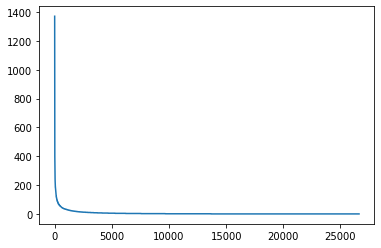

33
17


In [ ]:
import matplotlib.pyplot as plt
wc = tokenizer.word_counts
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(word_index)
print(newlist)
xs=[]
ys=[]
curr_x = 1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x+1
  ys.append(newlist[item])

print(ys)
plt.plot(xs,ys)
#plt.axis([300,10000,0,100])
plt.show()
print(ys[1000])
print(ys[2000])  

In [ ]:
print(ys[3125])
print(ys[10000])
print(ys[12156])


11
2
2


In [ ]:
#need this block to get it to work with Tensorflow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 7)           14000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              86400     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                6432      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 106,865
Trainable params: 106,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 25
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/25
750/750 - 47s - loss: 1.0385 - accuracy: 0.5621 - val_loss: 0.6865 - val_accuracy: 0.5748 - 47s/epoch - 62ms/step
Epoch 2/25
750/750 - 42s - loss: 0.5966 - accuracy: 0.6755 - val_loss: 0.5325 - val_accuracy: 0.7427 - 42s/epoch - 56ms/step
Epoch 3/25
750/750 - 42s - loss: 0.4732 - accuracy: 0.7876 - val_loss: 0.5107 - val_accuracy: 0.7693 - 42s/epoch - 57ms/step
Epoch 4/25
750/750 - 42s - loss: 0.4371 - accuracy: 0.8045 - val_loss: 0.4759 - val_accuracy: 0.7796 - 42s/epoch - 57ms/step
Epoch 5/25
750/750 - 42s - loss: 0.4161 - accuracy: 0.8177 - val_loss: 0.4729 - val_accuracy: 0.7789 - 42s/epoch - 57ms/step
Epoch 6/25
750/750 - 42s - loss: 0.3989 - accuracy: 0.8248 - val_loss: 0.4684 - val_accuracy: 0.7859 - 42s/epoch - 57ms/step
Epoch 7/25
750/750 - 42s - loss: 0.3816 - accuracy: 0.8337 - val_loss: 0.4676 - val_accuracy: 0.7889 - 42s/epoch - 56ms/step
Epoch 8/25
750/750 - 42s - loss: 0.3700 - accuracy: 0.8410 - val_loss: 0.4910 - val_accuracy: 0.7700 - 42s/epoch - 57ms/step


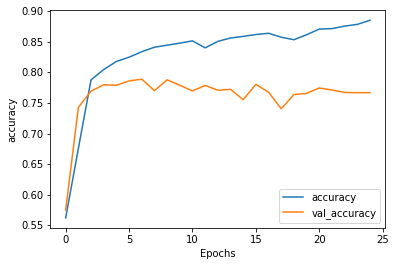

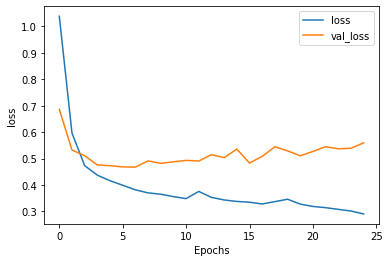

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")  

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])  

mom starting fear sons web series <OOV> thing will <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting fear sons web series closest thing will grandchild 
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)# shape:(vocab_size, embedding_dim)


(2000, 7)


In [ ]:
print(reverse_word_index[2])
print(weights[2])

new
[-0.0604227   0.10559198 -0.17086813  0.09424081 -0.11586362 -0.06946573
  0.08996291]


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding= 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding= 'utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embedding = weights[word_num]
    out_m.write(word +"\n")
    out_v.write('\t'. join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()    

NameError: ignored

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')
      

In [ ]:
test_sentences = ["It Was, For, Uh, Medical Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Him Haircut",
                  "It's a beautiful sunny day",
                  "I lived in Ireland, so in High School they made me learn to speak and write in Gaelic",
                  "Census Foot Soldiers Swarm Neighborhoods, Kick Down Doors To Tally Household Sizes"]
sequences = tokenizer.texts_to_sequences(test_sequences)
#print(sequences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
#print(padded)

predictions = model.predict(padded)
#print(predictions[:, max_length-1])

In [ ]:
print(predictions)